In [1]:
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [3]:
data = pd.read_csv("../data/Genre Classification Dataset/train_data.txt", sep=" ::: ", engine="python", header=None)
data.columns = ["id","title","genre","description"]
data = data[['genre','description']]
data.head()

,genre,description
0,drama,Listening in to a conversation between his doc...
1,thriller,A brother and sister with a past incestuous re...
2,adult,As the bus empties the students for their fiel...
3,drama,To help their unemployed father make ends meet...
4,drama,The film's title refers not only to the un-rec...


In [4]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"\d+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"\s+", " ", text).strip()
    return text

data['description'] = data['description'].apply(clean_text)

In [5]:
X = data['description']
y = data['genre']
vectorizer = TfidfVectorizer(max_features=5000)
X_vect = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_vect, y, test_size=0.2, random_state=42
)
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5854468320575487
              precision    recall  f1-score   support

      action       0.50      0.26      0.34       263
       adult       0.87      0.24      0.38       112
   adventure       0.43      0.14      0.21       139
   animation       0.58      0.07      0.12       104
   biography       0.00      0.00      0.00        61
      comedy       0.52      0.59      0.55      1443
       crime       0.20      0.01      0.02       107
 documentary       0.67      0.86      0.75      2659
       drama       0.54      0.78      0.64      2697
      family       0.43      0.09      0.14       150
     fantasy       0.00      0.00      0.00        74
   game-show       1.00      0.45      0.62        40
     history       0.00      0.00      0.00        45
      horror       0.63      0.55      0.59       431
       music       0.65      0.51      0.57       144
     musical       0.50      0.02      0.04        50
     mystery       1.00      0.02      0.04        5

c:\Users\Dell\OneDrive\Documents\Movie_genre\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Dell\OneDrive\Documents\Movie_genre\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Dell\OneDrive\Documents\Movie_genre\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

In [6]:
plot = input("Enter movie plot: ")
plot = clean_text(plot)
plot_vect = vectorizer.transform([plot])
prediction = model.predict(plot_vect)
print("Predicted Genre:", prediction[0])

Predicted Genre: short


Genre Distribution

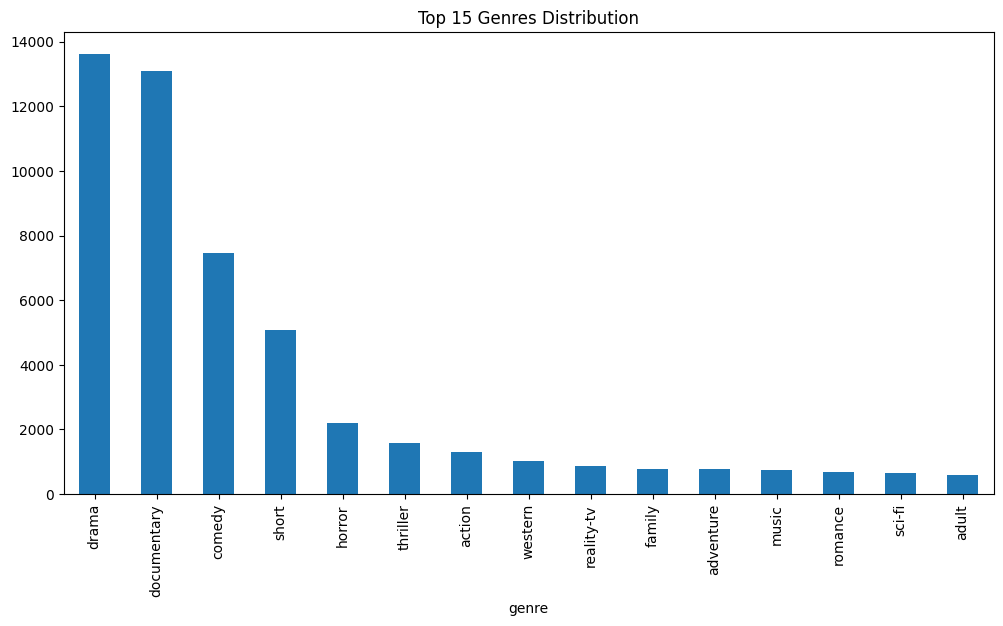

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
data['genre'].value_counts().head(15).plot(kind='bar')
plt.title("Top 15 Genres Distribution")
plt.show()

Description Length Distribution

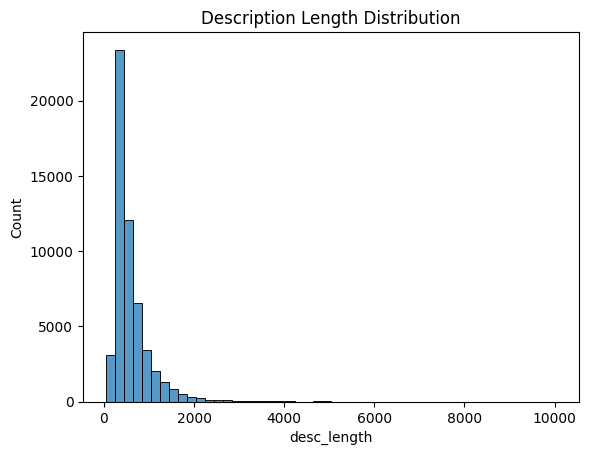

In [8]:
data['desc_length'] = data['description'].apply(len)
sns.histplot(data['desc_length'], bins=50)
plt.title("Description Length Distribution")
plt.show()

Accuracy Visualization

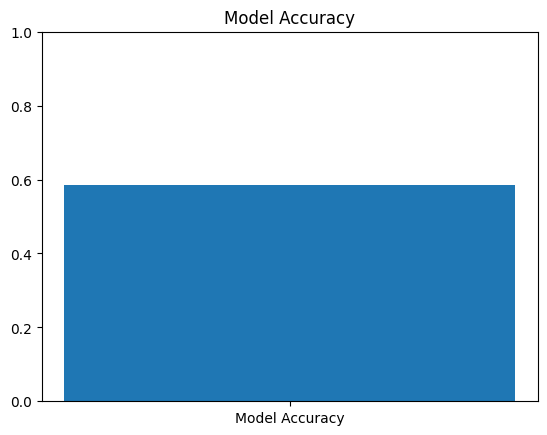

In [9]:
accuracy = accuracy_score(y_test, y_pred)

plt.bar(["Model Accuracy"], [accuracy])
plt.ylim(0,1)
plt.title("Model Accuracy")
plt.show()